In [251]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
import scipy.linalg as scln
from scipy.spatial import distance
import numpy.linalg as nplin

In [252]:
def randomizedsampling(samplesize, p):
    a = np.random.choice(2,samplesize,p = [p[0],p[1]])
    count = 0
    for i in a:
        if i == 1:
            count = count+1
    sampledset = [samplesize-count,count]
    return(sampledset)

In [253]:
def multivariate_Gaussian(mean, cov, sample):
    l = scln.cholesky(cov)
    z = np.random.normal(size=(sample, cov.shape[0]))
    return (z.dot(l)+mean)

In [254]:
def plotting(data,colour,label):
    for i,j,k in zip(data,colour,label):
        x = i[0]
        y = i[1]
        plt.scatter(x, y , c=j, label=k,marker = "^")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('multivariate gaussian distribution')
    plt.legend(loc=2)
    plt.show()

# Solution for 2.1:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


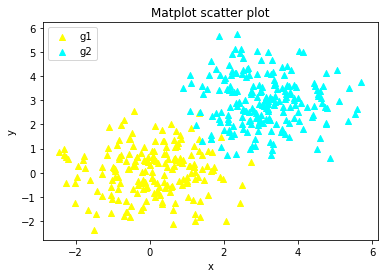

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(190,)


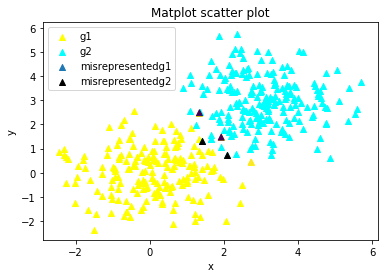

probabilty of error is  0.0125


In [255]:
p = [.5,.5]
samplesize = 400
samplingset = randomizedsampling(samplesize, p)
mean = np.array([0,0])
cov = np.identity(2)
x = multivariate_Gaussian(mean, cov, samplingset[0]).T
colors = (1,1,0)
g1 = (x[0,:],x[1,:])

mean1 = np.array([3,3])
cov1 = np.identity(2)
x1 = multivariate_Gaussian(mean1, cov1, samplingset[1]).T
colors1 = (0,1,1)
g2 = (x1[0,:],x1[1,:])

data = (g1, g2)
colour = (colors, colors1)
label = ("g1","g2")

plotting(data,colour,label)
# Plot for question 1
w1 = (mean)
w0 = np.matmul(mean.T,mean)*(-1/2)+np.log(1/2)
gx11 = np.matmul(w1.T,x)+w0
gx12 = np.matmul(w1.T,x1)+w0
w11 = (mean1)
w01 = np.matmul(mean1.T,mean1)*(-1/2)+np.log(1/2)
gx22 = np.matmul(w11.T,x1)+w01
gx21 = np.matmul(w11.T,x)+w01

gxx = gx21-gx11
gxy = gx22-gx12
a1  = []
a2 = []
print(gxx.shape)
for i in range(0,len(gxx)):
    if gxx[i]>0:
        a1.append(i)
for i in range(0,len(gxy)):
    if gxy[i]<0:
        a2.append(i)
b1 = [x[:,i] for i in a1]
b2 = [x1[:,i] for i in a2]
b1x = []
b1y = []
b2x = []
b2y = []
for i in b1:
    b1x.append(i[0])
    b1y.append(i[1])
for i in b2:
    b2x.append(i[0])
    b2y.append(i[1])
for i,j,k in zip(data,colour,label):
    x = i[0]
    y = i[1]
    plt.scatter(x, y , c=j, label=k, marker = "^")
plt.scatter(b1x,b1y,c =(1,0,0),label="misrepresentedg1", marker = "^")
plt.scatter(b2x,b2y,c =(0,0,0),label="misrepresentedg2", marker = "^")
plt.xlabel('x')
plt.ylabel('y')
plt.title('plot for 2.1')
plt.legend(loc=2)
plt.show()
error = (len(b1)+len(b2))/400
print('probabilty of error is ', error)

# Solution for 2.2:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


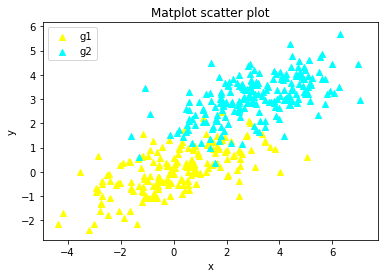

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[46, 63, 65, 72, 95, 163, 168]


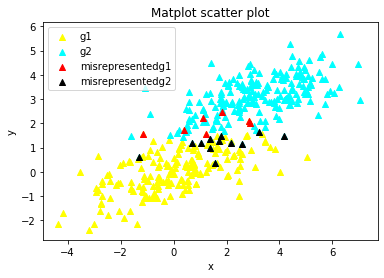

probabilty of error is  0.0475


In [262]:
p = [.5,.5]
samplesize = 400
samplingset = randomizedsampling(samplesize, p)
mean = np.array([0,0])
cov = np.matrix([[3,1],[1,.8]],dtype=float)
x = multivariate_Gaussian(mean, cov, samplingset[0]).T
mean = mean.reshape([2,1])
colors = (1,1,0)
g1 = (x[0,:],x[1,:])

mean1 = np.array([3,3])
x1 = multivariate_Gaussian(mean1, cov, samplingset[1]).T
mean1 = mean1.reshape([2,1])
colors1 = (0,1,1)
g2 = (x1[0,:],x1[1,:])
data = (g1, g2)
colour = (colors, colors1)
label = ("g1","g2")
covinv = cov.I
plotting(data,colour,label)
# Plot for question 2
w1 = np.matmul(covinv,mean)
w0 = np.matmul(mean.T,np.matmul(covinv,mean))*(-1/2)+np.log(1/2)
gx11 = np.matmul(w1.T,x)+w0
gx12 = np.matmul(w1.T,x1)+w0
w11 = np.matmul(covinv,mean1)
w01 = np.matmul(mean1.T,np.matmul(covinv,mean1))*(-1/2)+np.log(1/2)
gx22 = np.matmul(w11.T,x1)+w01
gx21 = np.matmul(w11.T,x)+w01

gxx = np.array(gx21-gx11)
gxy = np.array(gx22-gx12)
a1  = []
a2 = []
[Q,q] = gxx.shape
[L,l] = gxy.shape
for i in range(0,q):
    if gxx[0,i]>0:
        a1.append(i)
for i in range(0,l):
    if gxy[0,i]<0:
        a2.append(i)
print(a1)
b1 = [x[:,i] for i in a1]
b2 = [x1[:,i] for i in a2]
b1x = []
b1y = []
b2x = []
b2y = []
for i in b1:
    b1x.append(i[0])
    b1y.append(i[1])
for i in b2:
    b2x.append(i[0])
    b2y.append(i[1])
for i,j,k in zip(data,colour,label):
    x = i[0]
    y = i[1]
    plt.scatter(x, y , c=j, label=k, marker = "^")
plt.scatter(b1x,b1y,c =(1,0,0),label="misrepresentedg1", marker = "^")
plt.scatter(b2x,b2y,c =(0,0,0),label="misrepresentedg2", marker = "^")
plt.xlabel('x')
plt.ylabel('y')
plt.title('plot for 2.2')
plt.legend(loc=2)
plt.show()
error = (len(b1)+len(b2))/400
print('probabilty of error is ', error)

# Solution for 2.3:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


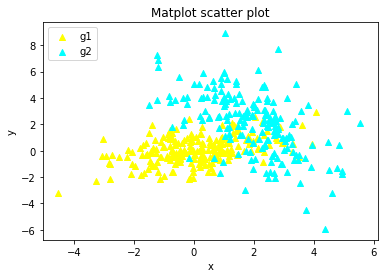

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

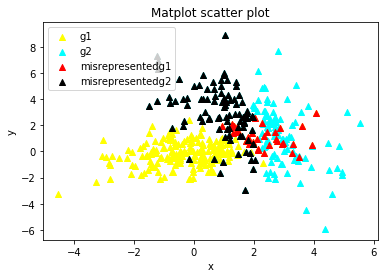

probabilty of error is  0.325


In [261]:
p = [.5,.5]
samplesize = 400
samplingset = randomizedsampling(samplesize, p)
mean = np.array([0,0])
cov = np.matrix([[2,.5],[.5,1]],dtype=float)
x = multivariate_Gaussian(mean, cov, samplingset[0]).T
mean = mean.reshape([2,1])
covinv = cov.I
colors = (1,1,0)
g1 = (x[0,:],x[1,:])

mean1 = np.array([2,2])
cov1 = np.matrix([[2,-1.9],[-1.9,5]],dtype=float)
x1 = multivariate_Gaussian(mean1, cov1, samplingset[1]).T
mean1 = mean1.reshape([2,1])
covinv1 = cov1.I
colors1 = (0,1,1)
g2 = (x1[0,:],x1[1,:])

data = (g1, g2)
colour = (colors, colors1)
label = ("g1","g2")

plotting(data,colour,label)
# Plot for question 2

w1 = np.matmul(covinv,mean)
W1 = -(1/2)*(covinv)
w0 = np.matmul(mean.T,np.matmul(covinv,mean))*(-1/2)+np.log(1/2)-(1/2)*np.log(nplin.det(cov))
gx11 = np.matmul(x.T,np.matmul(W1,x))+np.matmul(w1.T,x)+w0
gx12 = np.matmul(x1.T,np.matmul(W1,x1))+np.matmul(w1.T,x1)+w0
w11 = np.matmul(covinv1,mean1)
W11 = -(1/2)*(covinv1)
w01 = np.matmul(mean1.T,np.matmul(covinv1,mean1))*(-1/2)+np.log(1/2)-(1/2)*np.log(nplin.det(cov1))
gx22 = np.matmul(x1.T,np.matmul(W11,x1))+np.matmul(w11.T,x1)+w01
gx21 = np.matmul(x.T,np.matmul(W11,x))+np.matmul(w11.T,x)+w01

gxx = np.array(gx21-gx11)
gxy = np.array(gx22-gx12)
a1  = []
a2 = []
[Q,q] = gxx.shape
[L,l] = gxy.shape
for i in range(0,q):
    if gxx[0,i]>0:
        a1.append(i)
for i in range(0,l):
    if gxy[0,i]<0:
        a2.append(i)
b1 = [x[:,i] for i in a1]
b2 = [x1[:,i] for i in a2]
b1x = []
b1y = []
b2x = []
b2y = []
for i in b1:
    b1x.append(i[0])
    b1y.append(i[1])
for i in b2:
    b2x.append(i[0])
    b2y.append(i[1])
for i,j,k in zip(data,colour,label):
    x = i[0]
    y = i[1]
    plt.scatter(x, y , c=j, label=k, marker = "^")
plt.scatter(b1x,b1y,c =(1,0,0),label="misrepresentedg1", marker = "^")
plt.scatter(b2x,b2y,c =(0,0,0),label="misrepresentedg2", marker = "^")
plt.xlabel('x')
plt.ylabel('y')
plt.title('plot for 2.3')
plt.legend(loc=2)
plt.show()
error = (len(b1)+len(b2))/400
print('probabilty of error is ', error)

# Solution for 2.4:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


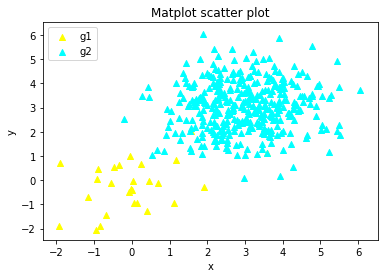

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

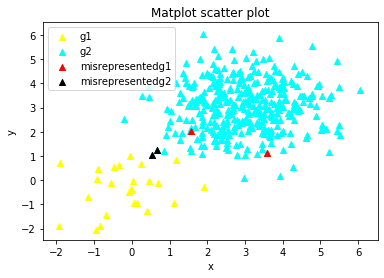

probabilty of error is  0.01


In [258]:
p = [.05,.95]
samplesize = 400
samplingset = randomizedsampling(samplesize, p)
mean = np.array([0,0])
cov = np.identity(2)

x = multivariate_Gaussian(mean, cov, samplingset[0]).T
colors = (1,1,0)
g1 = (x[0,:],x[1,:])

mean1 = np.array([3,3])
cov1 = np.identity(2)

x1 = multivariate_Gaussian(mean1, cov1, samplingset[1]).T
colors1 = (0,1,1)
g2 = (x1[0,:],x1[1,:])

data = (g1, g2)
colour = (colors, colors1)
label = ("g1","g2")

plotting(data,colour,label)
# Plot for question 1
w1 = (mean)
w0 = np.matmul(mean.T,mean)*(-1/2)+np.log(p[0])
gx11 = np.matmul(w1.T,x)+w0
gx12 = np.matmul(w1.T,x1)+w0
w11 = (mean1)
w01 = np.matmul(mean1.T,mean1)*(-1/2)+np.log(p[1])
gx22 = np.matmul(w11.T,x1)+w01
gx21 = np.matmul(w11.T,x)+w01

gxx = (gx21-gx11)
gxy = (gx22-gx12)
a1  = []
a2 = []
for i in range(0,len(gxx)):
    if gxx[i]>0:
        a1.append(i)
for i in range(0,len(gxy)):
    if gxy[i]<0:
        a2.append(i)
b1 = [x[:,i] for i in a1]
b2 = [x1[:,i] for i in a2]
b1x = []
b1y = []
b2x = []
b2y = []
for i in b1:
    b1x.append(i[0])
    b1y.append(i[1])
for i in b2:
    b2x.append(i[0])
    b2y.append(i[1])
for i,j,k in zip(data,colour,label):
    x = i[0]
    y = i[1]
    plt.scatter(x, y , c=j, label=k, marker = "^")
plt.scatter(b1x,b1y,c =(1,0,0),label="misrepresentedg1", marker = "^")
plt.scatter(b2x,b2y,c =(0,0,0),label="misrepresentedg2", marker = "^")
plt.xlabel('x')
plt.ylabel('y')
plt.title('plot for 2.4')
plt.legend(loc=2)
plt.show()
error = (len(b1)+len(b2))/400
print('probabilty of error is ', error)

# Solution for 2.5:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


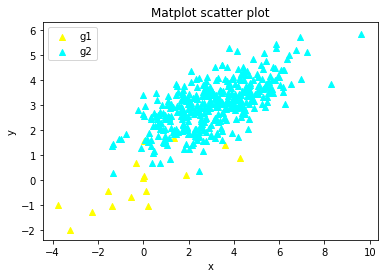

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[1, 12, 13, 14]


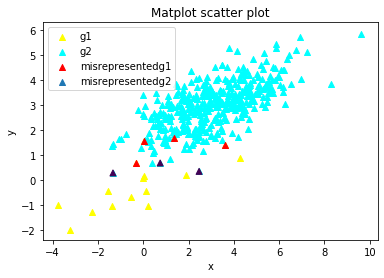

probabilty of error is  0.0175


In [259]:
p = [.05,.95]
samplesize = 400
samplingset = randomizedsampling(samplesize, p)
mean = np.array([0,0])
cov = np.matrix([[3,1],[1,.8]],dtype=float)

x = multivariate_Gaussian(mean, cov, samplingset[0]).T
mean = mean.reshape([2,1])
colors = (1,1,0)
g1 = (x[0,:],x[1,:])

mean1 = np.array([3,3])
x1 = multivariate_Gaussian(mean1, cov, samplingset[1]).T

mean1 = mean1.reshape([2,1])
colors1 = (0,1,1)
g2 = (x1[0,:],x1[1,:])
data = (g1, g2)
colour = (colors, colors1)
label = ("g1","g2")
covinv = cov.I
plotting(data,colour,label)
# Plot for question 2
w1 = np.matmul(covinv,mean)
w0 = np.matmul(mean.T,np.matmul(covinv,mean))*(-1/2)+np.log(p[0])
gx11 = np.matmul(w1.T,x)+w0
gx12 = np.matmul(w1.T,x1)+w0
w11 = np.matmul(covinv,mean1)
w01 = np.matmul(mean1.T,np.matmul(covinv,mean1))*(-1/2)+np.log(p[1])
gx22 = np.matmul(w11.T,x1)+w01
gx21 = np.matmul(w11.T,x)+w01

gxx = np.array(gx21-gx11)
gxy = np.array(gx22-gx12)
a1  = []
a2 = []
[Q,q] = gxx.shape
[L,l] = gxy.shape
for i in range(0,q):
    if gxx[0,i]>0:
        a1.append(i)
for i in range(0,l):
    if gxy[0,i]<0:
        a2.append(i)

b1 = [x[:,i] for i in a1]
b2 = [x1[:,i] for i in a2]
b1x = []
b1y = []
b2x = []
b2y = []
for i in b1:
    b1x.append(i[0])
    b1y.append(i[1])
for i in b2:
    b2x.append(i[0])
    b2y.append(i[1])
for i,j,k in zip(data,colour,label):
    x = i[0]
    y = i[1]
    plt.scatter(x, y , c=j, label=k, marker = "^")
plt.scatter(b1x,b1y,c =(1,0,0),label="misrepresentedg1", marker = "^")
plt.scatter(b2x,b2y,c =(0,0,0),label="misrepresentedg2", marker = "^")
plt.xlabel('x')
plt.ylabel('y')
plt.title('plot for 2.5')
plt.legend(loc=2)
plt.show()
error = (len(b1)+len(b2))/400
print('probabilty of error is ', error)

# Solution for 2.6:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


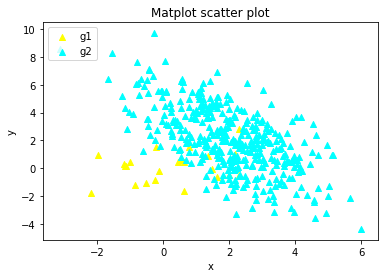

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[2, 4, 6, 9, 10, 13, 14, 16, 17, 19, 20, 21, 23]


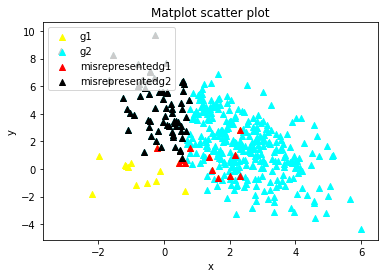

probabilty of error is  0.2025


In [260]:
p = [.05,.95]
samplesize = 400
samplingset = randomizedsampling(samplesize, p)
mean = np.array([0,0])
cov = np.matrix([[2,.5],[.5,1]],dtype=float)

x = multivariate_Gaussian(mean, cov, samplingset[0] ).T
mean = mean.reshape([2,1])
covinv = cov.I
colors = (1,1,0)
g1 = (x[0,:],x[1,:])

mean1 = np.array([2,2])
cov1 = np.matrix([[2,-1.9],[-1.9,5]],dtype=float)

x1 = multivariate_Gaussian(mean1, cov1, samplingset[1] ).T
mean1 = mean1.reshape([2,1])
covinv1 = cov1.I
colors1 = (0,1,1)
g2 = (x1[0,:],x1[1,:])

data = (g1, g2)
colour = (colors, colors1)
label = ("g1","g2")

plotting(data,colour,label)
# Plot for question 2

w1 = np.matmul(covinv,mean)
W1 = -(1/2)*(covinv)
w0 = np.matmul(mean.T,np.matmul(covinv,mean))*(-1/2)+np.log(p[0])-(1/2)*np.log(nplin.det(cov))
gx11 = np.matmul(x.T,np.matmul(W1,x))+np.matmul(w1.T,x)+w0
gx12 = np.matmul(x1.T,np.matmul(W1,x1))+np.matmul(w1.T,x1)+w0
w11 = np.matmul(covinv1,mean1)
W11 = -(1/2)*(covinv1)
w01 = np.matmul(mean1.T,np.matmul(covinv1,mean1))*(-1/2)+np.log(p[1])-(1/2)*np.log(nplin.det(cov1))
gx22 = np.matmul(x1.T,np.matmul(W11,x1))+np.matmul(w11.T,x1)+w01
gx21 = np.matmul(x.T,np.matmul(W11,x))+np.matmul(w11.T,x)+w01

gxx = np.array(gx21-gx11)
gxy = np.array(gx22-gx12)
a1  = []
a2 = []
[Q,q] = gxx.shape
[L,l] = gxy.shape
for i in range(0,q):
    if gxx[0,i]>0:
        a1.append(i)
for i in range(0,l):
    if gxy[0,i]<0:
        a2.append(i)
print(a1)
b1 = [x[:,i] for i in a1]
b2 = [x1[:,i] for i in a2]
b1x = []
b1y = []
b2x = []
b2y = []
for i in b1:
    b1x.append(i[0])
    b1y.append(i[1])
for i in b2:
    b2x.append(i[0])
    b2y.append(i[1])
for i,j,k in zip(data,colour,label):
    x = i[0]
    y = i[1]
    plt.scatter(x, y , c=j, label=k, marker = "^")
plt.scatter(b1x,b1y,c =(1,0,0),label="misrepresentedg1", marker = "^")
plt.scatter(b2x,b2y,c =(0,0,0),label="misrepresentedg2", marker = "^")
plt.xlabel('x')
plt.ylabel('y')
plt.title('plot for 2.6')
plt.legend(loc=2)
plt.show()
error = (len(b1)+len(b2))/400
print('probabilty of error is ', error)